In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
review_df = pd.read_csv("C:/Users/chatt/Documents/Data_Analysis/Machine Learning/Sentiment Analysis/amazon_alexa.tsv", sep='\t')

In [4]:
review_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


FIELD INFO:

RATING: SCORE OUT OF 5 GIVEN BY THE CUSTOMER

DATE: DATE OF REVIEW

VARIATION: MODEL OF ECHO BOUGHT BY THE CUSTOMER

VERIFIED_REVIEWS: REVIEW BY THE CUSTOMER

FEEBACK: 1 -> IF RATING IS 4 OR 5 (SIGNIFYING POSITIVE SENTIMENT); 0 -> OTHERWISE (SIGNIFYING NEGATIVE SENTIMENT)

In [5]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [6]:
review_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


Overall Summary: A lot of people seem to be happy with the product.

DATA EXPLORATION

<Axes: >

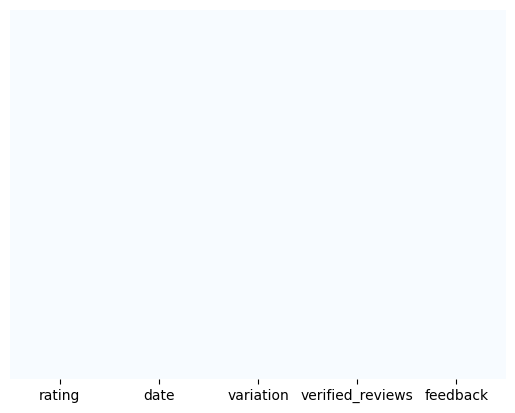

In [7]:
#checking missing values
sns.heatmap(review_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'feedback'}>]], dtype=object)

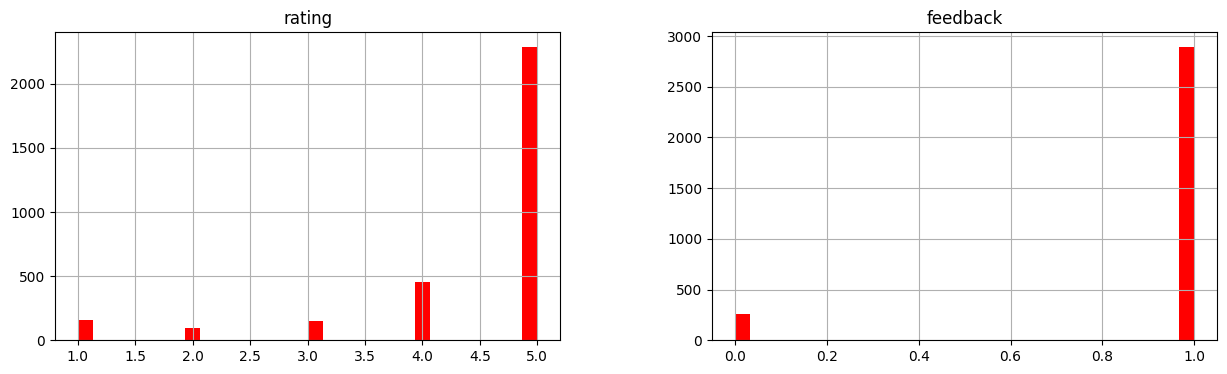

In [8]:
review_df.hist(bins = 30, figsize=(15,4), color='r' )

In [10]:
review_df['verified_reviews'] = review_df['verified_reviews'].fillna('')
review_df['length'] = review_df['verified_reviews'].apply(len)

In [11]:
review_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


<Axes: ylabel='Frequency'>

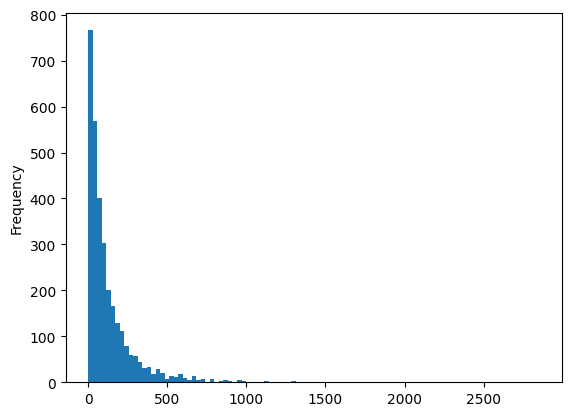

In [12]:
review_df['length'].plot(bins= 100, kind= 'hist')

In [13]:
review_df.length.describe()

count    3150.000000
mean      132.048254
std       182.100859
min         0.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [16]:
review_df[review_df['length']==2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

Checking the count of positive and negative reviews

In [19]:
review_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


<Axes: xlabel='feedback', ylabel='count'>

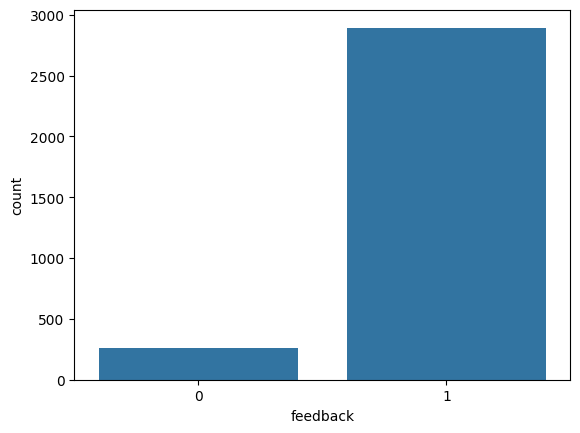

In [20]:
sns.countplot(x='feedback', data=review_df)

<Axes: xlabel='rating', ylabel='count'>

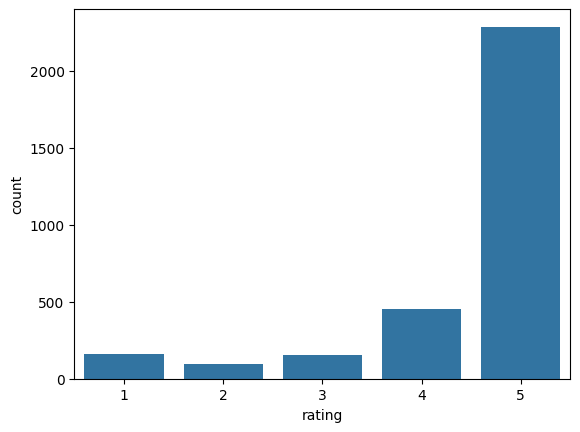

In [21]:
sns.countplot(x='rating', data=review_df)

C:\Users\chatt\AppData\Local\Temp\ipykernel_46492\3963484243.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='variation', y='rating', data=review_df, palette='deep')


<Axes: xlabel='variation', ylabel='rating'>

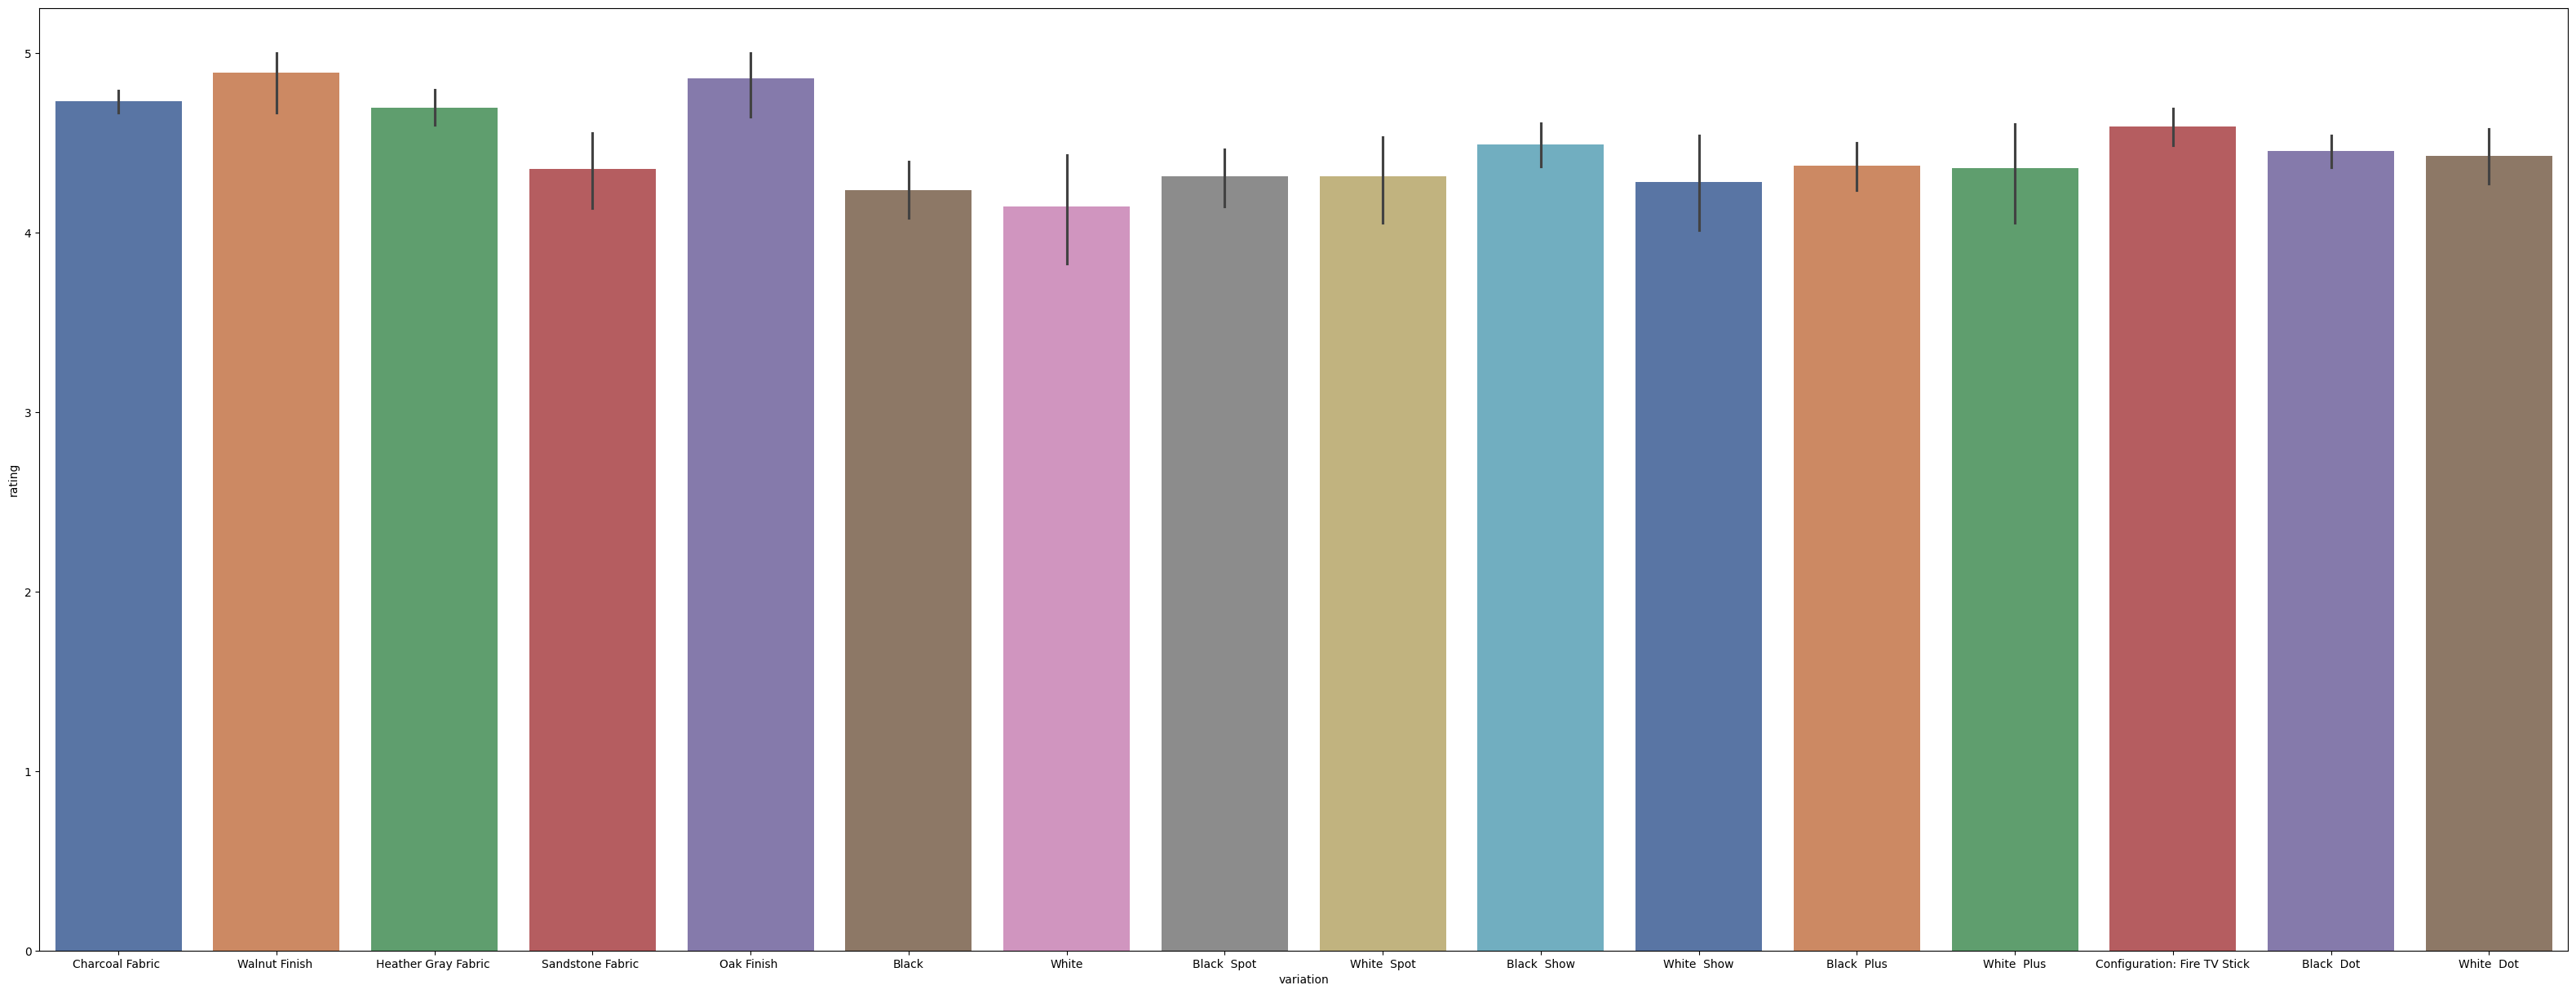

In [22]:
plt.figure(figsize=(40,15))
sns.barplot(x='variation', y='rating', data=review_df, palette='deep')

All the variations almost have the same rating. Highest rating is of Oak Finish and Walnut Finish. Maybe we can explore that!

Creating a WORD-CLOUD

In [23]:
sentences = review_df['verified_reviews'].tolist()

In [24]:
sentences_as_one_string = " ".join(sentences)

In [ ]:
from wordcloud import WordCloud

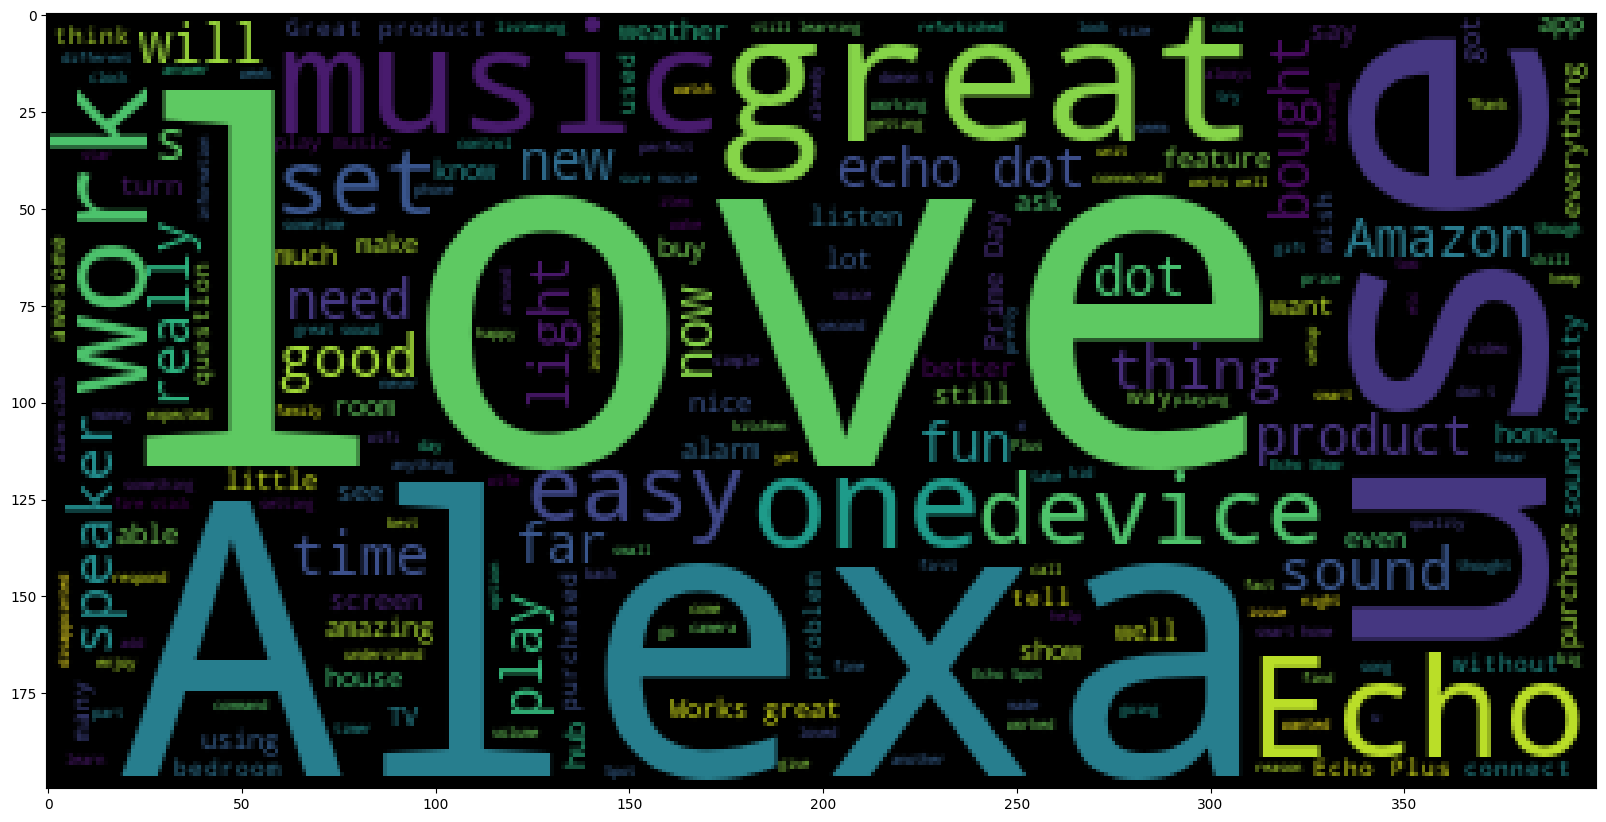

In [29]:
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [30]:
negative_list = review_df[review_df['feedback']==0]['verified_reviews'].tolist()

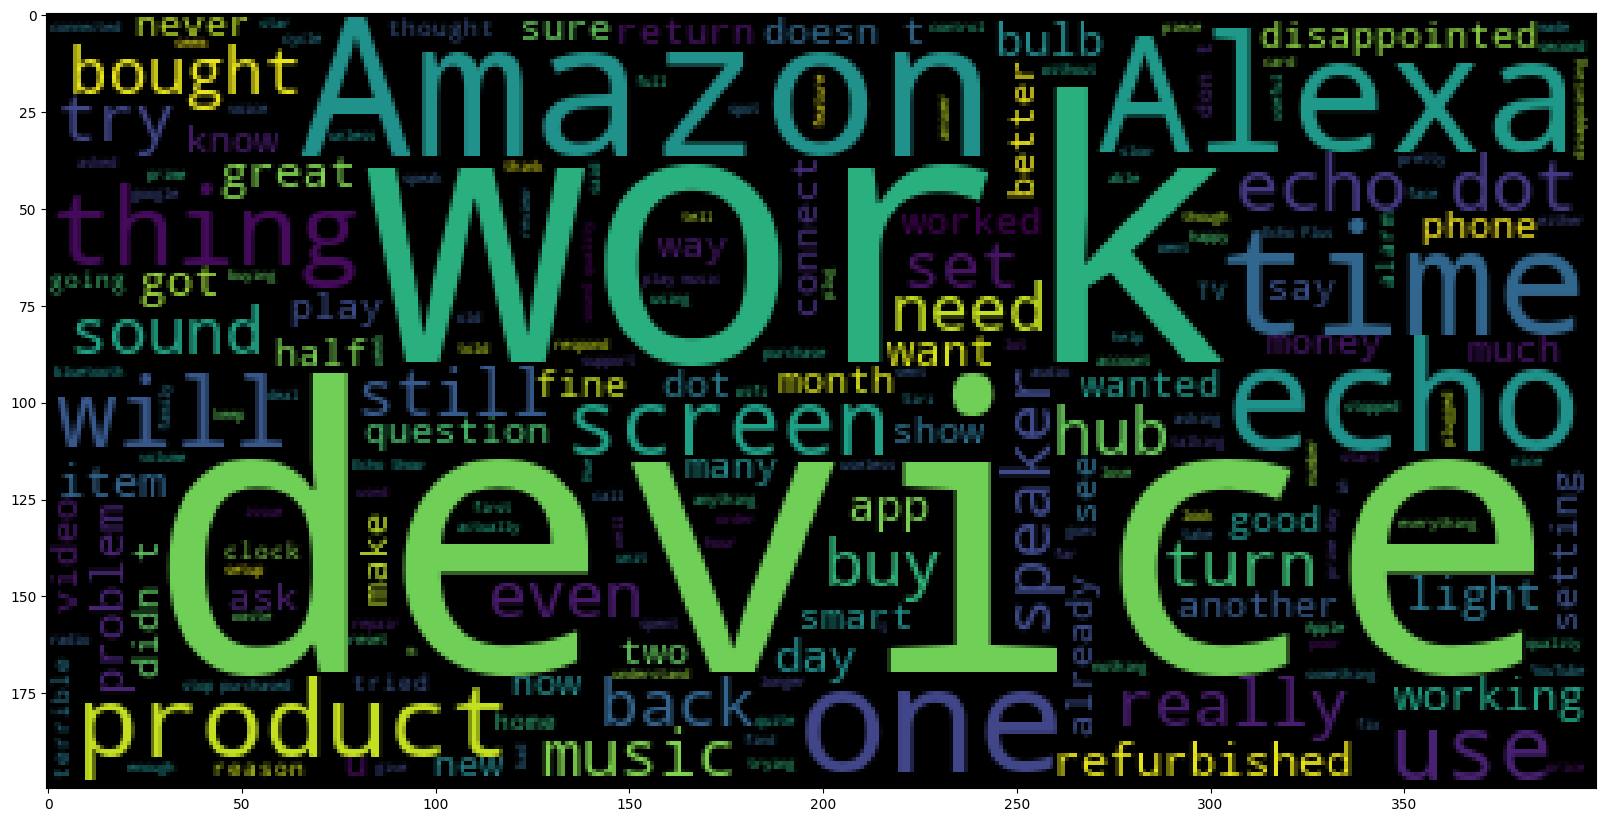

In [33]:
neg_sentences_as_one_string = " ".join(negative_list)
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(neg_sentences_as_one_string))

DATA CLEANING

In [34]:
review_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [35]:
review_df = review_df.drop(columns=['rating','date','length'])

In [37]:
variation_dummies = pd.get_dummies(review_df['variation'], drop_first=True)

In [38]:
review_df.drop(columns=['variation'], inplace=True)

In [39]:
review_df = pd.concat([review_df,variation_dummies], axis =1)

MAKING A TEXT CLEANING PIPELINE

In [41]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chatt\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
def message_clean(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [44]:
#cleaning the "verified reviews" column from noise
review_df_clean = review_df['verified_reviews'].apply(message_clean)

In [46]:
#using the vectorizer for Tokenization

vectorizer = CountVectorizer(analyzer = message_clean)
review_vectorizer = vectorizer.fit_transform(review_df['verified_reviews'])

In [48]:
#printing of the unique words
print(vectorizer.get_feature_names_out())

['072318' '1' '10' ... '😬' '😳' '🤓']


In [49]:
print(review_vectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [50]:
review_vectorizer.shape

(3150, 5211)

In [51]:
review_df.drop(columns=['verified_reviews'], inplace=True)

In [53]:
reviews = pd.DataFrame(review_vectorizer.toarray())

In [55]:
reviews_df = pd.concat([review_df, reviews], axis=1)

In [64]:
reviews_df.head()

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,1,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,1,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,1,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,1,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,1,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


DESIGNATING THE INPUT AND OUTPUT

In [65]:
X = reviews_df.drop(['feedback'], axis=1)
X = X.rename(columns=lambda c: str(c))

In [66]:
y = reviews_df['feedback']

MODEL TRAINING

In [67]:
X.shape

(3150, 5226)

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

EVALUATING A NAIVE BAYES CLASSIFIER

In [69]:
from sklearn.naive_bayes import MultinomialNB

In [70]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = NB_classifier.predict(X_train)

In [72]:
y_predict_train

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

<Axes: >

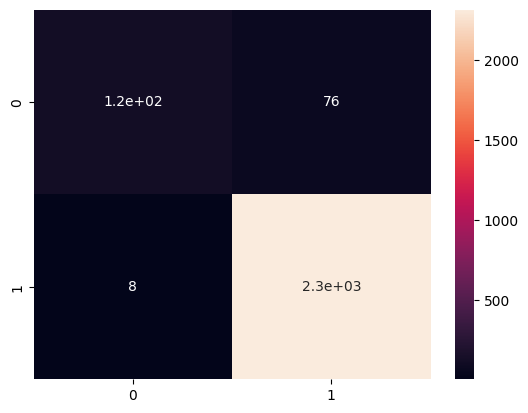

In [73]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

<Axes: >

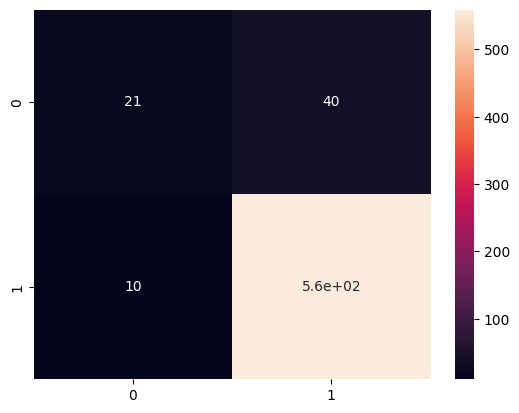

In [74]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [75]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.68      0.34      0.46        61
           1       0.93      0.98      0.96       569

    accuracy                           0.92       630
   macro avg       0.81      0.66      0.71       630
weighted avg       0.91      0.92      0.91       630



EVALUATING A LOGISTIC REGRESSION CLASSIFIER

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [77]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [78]:
y_pred = model.predict(X_test)

In [79]:
print("Accuracy {}%".format(100*accuracy_score(y_pred, y_test)))

Accuracy 93.80952380952381%


<Axes: >

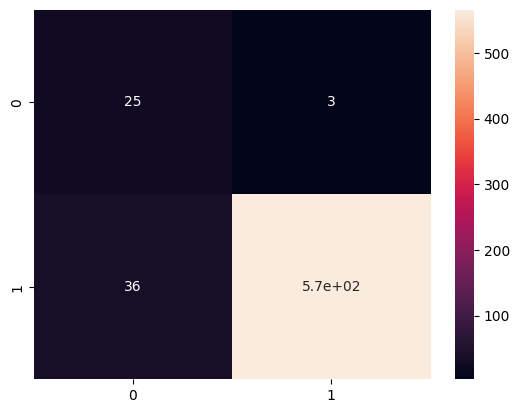

In [80]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.41      0.56        61
           1       0.94      0.99      0.97       569

    accuracy                           0.94       630
   macro avg       0.92      0.70      0.76       630
weighted avg       0.94      0.94      0.93       630

